# <u>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>Email ID:</u> advaitchavan135@gmail.com
# CDAC PGDAI MACHINE LEARNING ASSIGNMENT__1

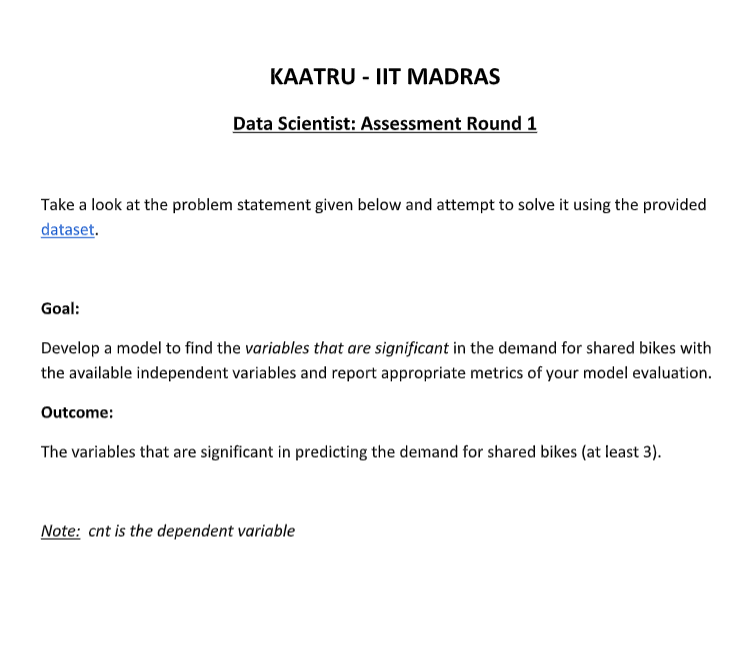

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ADVAIT CHAVAN - day - day.csv")

In [3]:
df['dteday'] = pd.to_datetime(df['dteday'], format="%d-%m-%Y")

In [4]:
print(df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        1           1   
1        2 2018-01-02       1   0     1        0        2           1   
2        3 2018-01-03       1   0     1        0        3           1   
3        4 2018-01-04       1   0     1        0        4           1   
4        5 2018-01-05       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
print(df.describe())

          instant               dteday      season          yr        mnth  \
count  730.000000                  730  730.000000  730.000000  730.000000   
mean   365.500000  2018-12-31 12:00:00    2.498630    0.500000    6.526027   
min      1.000000  2018-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.250000  2018-07-02 06:00:00    2.000000    0.000000    4.000000   
50%    365.500000  2018-12-31 12:00:00    3.000000    0.500000    7.000000   
75%    547.750000  2019-07-01 18:00:00    3.000000    1.000000   10.000000   
max    730.000000  2019-12-31 00:00:00    4.000000    1.000000   12.000000   
std    210.877136                  NaN    1.110184    0.500343    3.450215   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.028767    2.995890    0.690411    1.394521   20.319259   23.726322   
min      0.000000    0.000000    0.000000    1.000000 

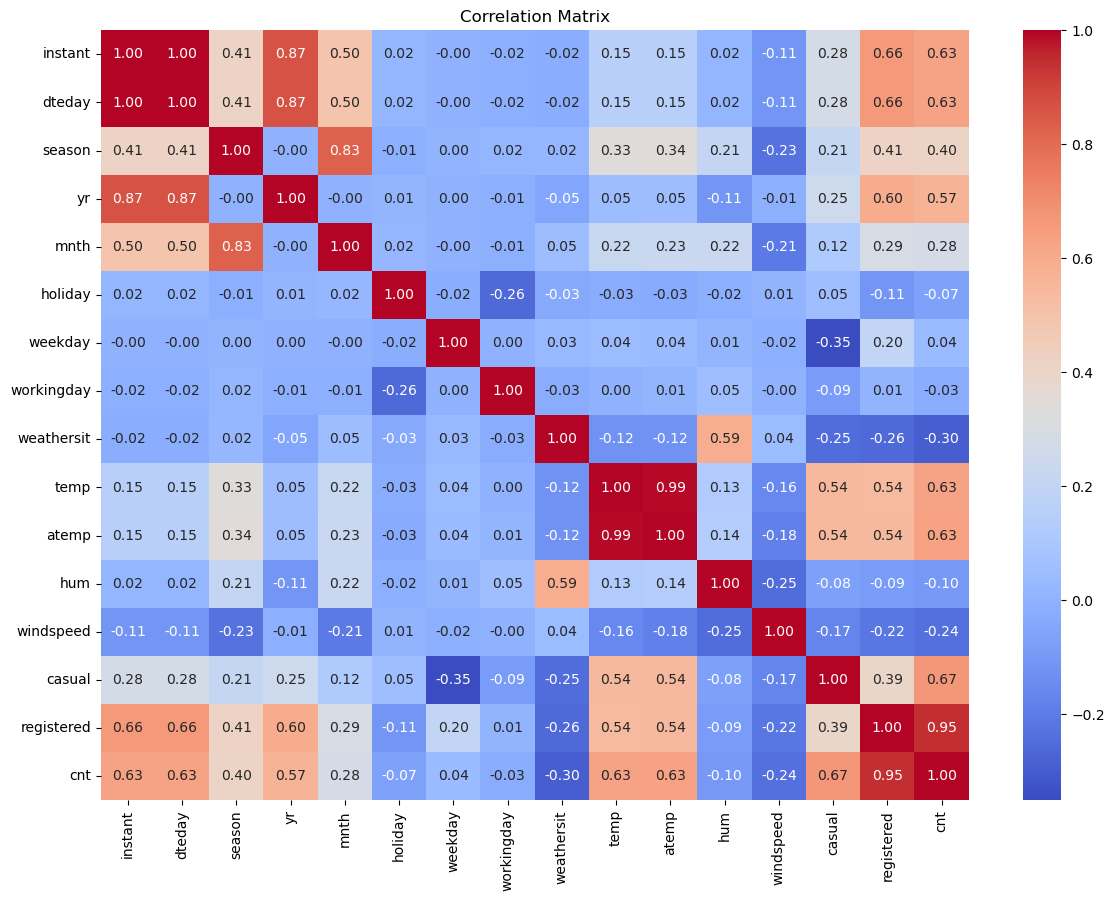

In [7]:
plt.figure(figsize=(14,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Temperature (temp and atemp) tends to be positively correlated with bike demand.

## Humidity (hum) might show a negative impact.

## Windspeed may also have an adverse effect when high.

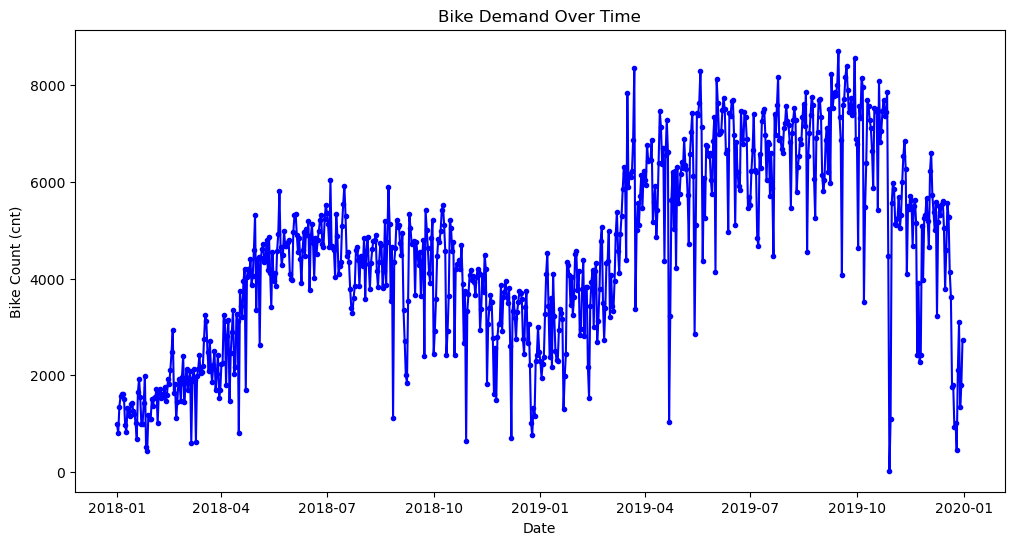

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['dteday'], df['cnt'], marker=".", linestyle='-', color='blue')
plt.xlabel("Date")
plt.ylabel("Bike Count (cnt)")
plt.title("Bike Demand Over Time")
plt.show()

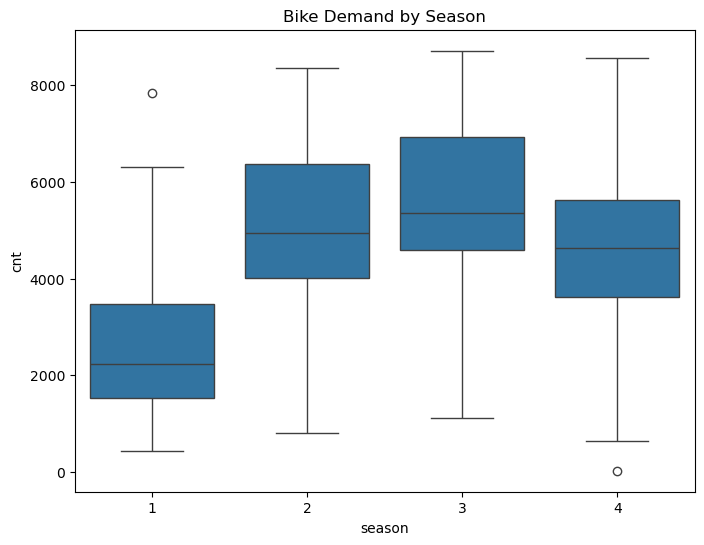

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title("Bike Demand by Season")
plt.show()

In [10]:
import statsmodels.api as sm

In [11]:
predictors = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
              'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X = df[predictors]

In [12]:
X = sm.add_constant(X)

In [13]:
y = df['cnt']

In [14]:
model = sm.OLS(y, X).fit()

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     257.5
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          1.43e-240
Time:                        21:06:16   Log-Likelihood:                -5976.9
No. Observations:                 730   AIC:                         1.198e+04
Df Residuals:                     718   BIC:                         1.203e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1859.3380    237.485      7.829      0.0

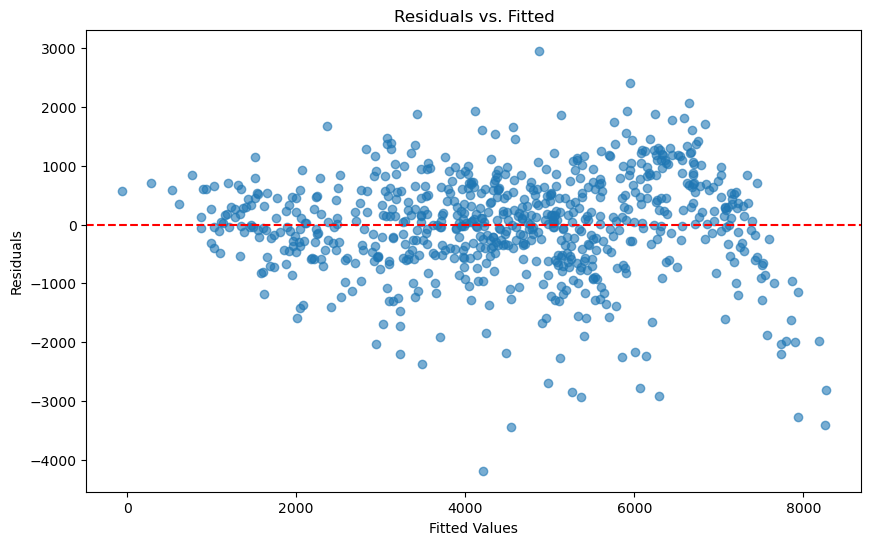

In [16]:
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10,6))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

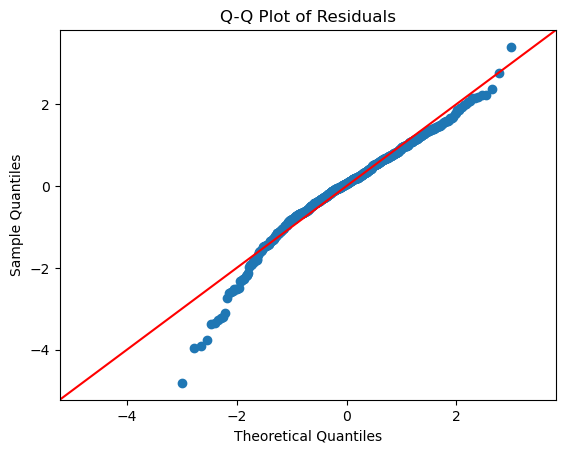

In [17]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns  # X is your predictors DataFrame with constant added
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

       feature        VIF
0        const  53.496641
1       season   3.543616
2           yr   1.020682
3         mnth   3.328912
4      holiday   1.077958
5      weekday   1.007983
6   workingday   1.088247
7   weathersit   1.745974
8         temp  63.494473
9        atemp  64.470385
10         hum   1.920161
11   windspeed   1.200998


### A VIF value greater than 5 (or, in some cases, 10) may indicate problematic multicollinearity.

In [20]:
df['day_of_week'] = df['dteday'].dt.dayofweek

In [21]:
print(df[['dteday', 'day_of_week']].head())

      dteday  day_of_week
0 2018-01-01            0
1 2018-01-02            1
2 2018-01-03            2
3 2018-01-04            3
4 2018-01-05            4


In [22]:
df['temp_weathersit'] = df['temp'] * df['weathersit']

In [23]:
df['cnt_lag_1'] = df['cnt'].shift(1)

In [24]:
df['cnt_roll_mean_7'] = df['cnt'].rolling(window=7).mean()

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [26]:
predictors = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
              'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

In [27]:
X = df[predictors].dropna()

In [28]:
y = df.loc[X.index, 'cnt']

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate using RMSE
preds_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, preds_rf))
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 625.3045629886011


In [30]:
importances = rf.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
print(importance_df)

       feature  importance
7         temp    0.384494
1           yr    0.296146
8        atemp    0.139187
0       season    0.068066
9          hum    0.044586
6   weathersit    0.024620
10   windspeed    0.021708
2         mnth    0.017008
4      weekday    0.002395
3      holiday    0.001183
5   workingday    0.000608


In [34]:
print('The variables that are significant in predicting the demand for shared bikes (using Ranoom Forest Regressor): -\n', importance_df.head(3))

The variables that are significant in predicting the demand for shared bikes (using Ranoom Forest Regressor): -
   feature  importance
7    temp    0.384494
1      yr    0.296146
8   atemp    0.139187


In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [36]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

In [37]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = {'RMSE': rmse, 'R2': r2, 'MAE': mae}

C:\Users\Advait\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.643e+06, tolerance: 2.228e+05
  model = cd_fast.enet_coordinate_descent(


In [38]:
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                        RMSE        R2         MAE
LinearRegression  757.198196  0.832493  570.132071
Ridge             759.001353  0.831695  570.377405
Lasso             755.386528  0.833294  569.377685
RandomForest      545.968272  0.912914  422.377603
GradientBoosting  567.927257  0.905768  439.247010


### The RandomForest Regressor has the lowest RMSE and MAE along with the highest R², so it appears to be the best model.

In [39]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [40]:
best_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
final_predictions = best_model.predict(X_test)

In [42]:
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_r2 = r2_score(y_test, final_predictions)
final_mae = mean_absolute_error(y_test, final_predictions)

In [43]:
print("Final Model Performance (RandomForestRegressor):")
print(f"RMSE: {final_rmse:.3f}")
print(f"R2: {final_r2:.3f}")
print(f"MAE: {final_mae:.3f}")

Final Model Performance (RandomForestRegressor):
RMSE: 545.968
R2: 0.913
MAE: 422.378


In [44]:
importances = best_model.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
print(importance_df)

       feature  importance
7         temp    0.361580
1           yr    0.268370
8        atemp    0.142109
0       season    0.064260
9          hum    0.058770
10   windspeed    0.036889
6   weathersit    0.025648
2         mnth    0.024791
4      weekday    0.010669
3      holiday    0.003478
5   workingday    0.003436


In [45]:
print('The variables that are significant in predicting the demand for shared bikes (using Ranoom Forest Regressor(Best Model)): -\n', importance_df.head(3))

The variables that are significant in predicting the demand for shared bikes (using Ranoom Forest Regressor(Best Model)): -
   feature  importance
7    temp    0.361580
1      yr    0.268370
8   atemp    0.142109
